In [1]:
from brenda import read_data, write_data, stats
from recherche_chemin import pluscourtchemin
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
sns.set(style="darkgrid", palette="muted", font_scale=1.1)

In [3]:
#@title Extract data
molecularities, molecules, reactifs = stats('data.json')

In [4]:
dataframe = pd.DataFrame()
dataframe['molecules'] = molecules
dataframe['molecularities'] = list(map(lambda x : x[1], molecularities))
dataframe.head(3)

,molecules,molecularities
0,H2O,46706
1,O2,11609
2,ATP,7780


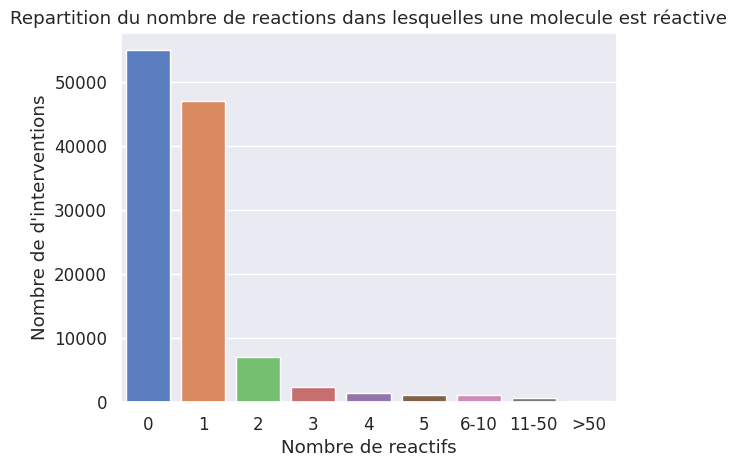

In [5]:
bins = [-1, 0, 1, 2, 3, 4, 5, 10, 50, 47000]
dataframe['cluster'] = pd.cut(dataframe['molecularities'], bins=bins)
df = dataframe['cluster'].value_counts()
df.index = [0, 1, 2,3, 4, 5, "6-10", "11-50", ">50"]
sns.barplot(x=df.index, y=df.values)
plt.title('Repartition du nombre de reactions dans lesquelles une molecule est réactive')
plt.xlabel('Nombre de reactifs')
plt.ylabel('Nombre de d\'interventions')
plt.show()

In [6]:
# Etude du nombre de réactifs dans les réactions
reaction_df = pd.DataFrame()
reaction_df['reactifs'] = list(map(lambda x : x[1], reactifs))
bins_reactifs_count = [-0, 1, 2, 3, 5, 100]
reaction_df['cluster'] = pd.cut(reaction_df['reactifs'], bins=bins_reactifs_count).apply(lambda x : str(x.right) if x.right != 100 else " > 6")
reaction_df.head(3)

,reactifs,cluster
0,6,> 6
1,5,5
2,5,5


In [7]:
df2 = reaction_df['cluster'].value_counts()
# df2['Nombre de reactifs'] =  #bins_reactifs_count[:-1] + ["> " + str(bins_reactifs_count[-1])]
df2.index = ["2", "3", "1", "3-5", ">5"]
df2

2      87367
3      17766
1       7116
3-5     2849
>5         1
Name: count, dtype: int64

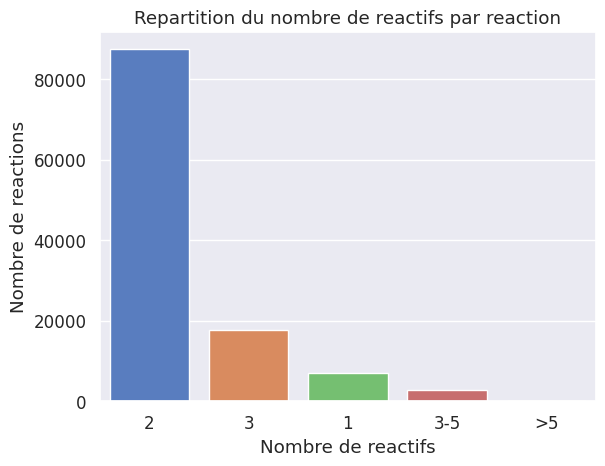

In [8]:
sns.barplot(x=df2.index, y=df2.values)
plt.title('Repartition du nombre de reactifs par reaction')
plt.xlabel('Nombre de reactifs')
plt.ylabel('Nombre de reactions')
plt.show()

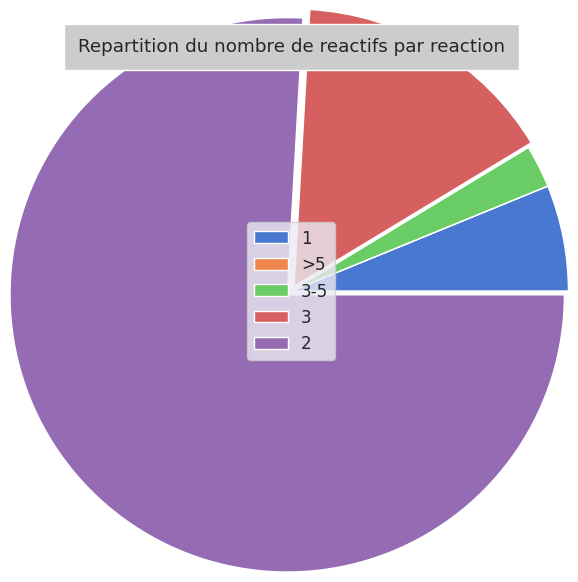

In [9]:
df2 = df2.sample(frac=1)
explode = df2.apply(lambda x : 0.03 * int(x > 17000))
plt.figure(figsize=(8, 6))
plt.pie(df2.values, explode=explode, colors=sns.color_palette(), radius = 1.5)
plt.title('Repartition du nombre de reactifs par reaction', bbox={'facecolor':'0.8', 'pad':10})
plt.legend(df2.index, loc = "center")
# plt.xlabel('Nombre de reactifs')
# plt.ylabel('Nombre de reactions')
plt.show()

In [10]:
data = read_data('data.json')
dic_name_to_idx = data['dic_name_to_idx']
dic_idx_to_name = data['dic_idx_to_name']
reactions = data['reactions']
reactions_per_molecule = data['reactions_per_molecule']
enz = []
reac = [dic_name_to_idx['SAALQSGF-NH2'], dic_name_to_idx['H2O']]
prod = dic_name_to_idx['SAALQ']
n = 50
imprime = True
list_reaction = 'list reaction'

# Pour tester pluscourtchemin : il faut gérér les paramètres...
# mecanisme = pluscourtchemin(enz, reac, prod, n, imprime, list_reaction, dic_idx_to_name, reactions, reactions_per_molecule)

In [11]:
import brenda
data = brenda.read_data('data.json')
dic_idx_to_name = data['dic_idx_to_name']
clusters = data['cluster']
reachables = data['reachable']
frame = pd.DataFrame({
    'clusters': clusters,
    'reachables': [len(elmt) for elmt in reachables],
    'molecule': list(map(lambda x : dic_idx_to_name[str(x)], range(len(dic_idx_to_name))))
})
frame.head(5)

,clusters,reachables,molecule
0,0,0,semidehydroascorbate
1,1,0,acyclicandcyclicmonoterpenes
2,46380,2,Bem3
3,3,0,NO2-[side 1]
4,81890,4,F4 capsid precursor protein


Text(0, 0.5, 'Nombre de molecules')

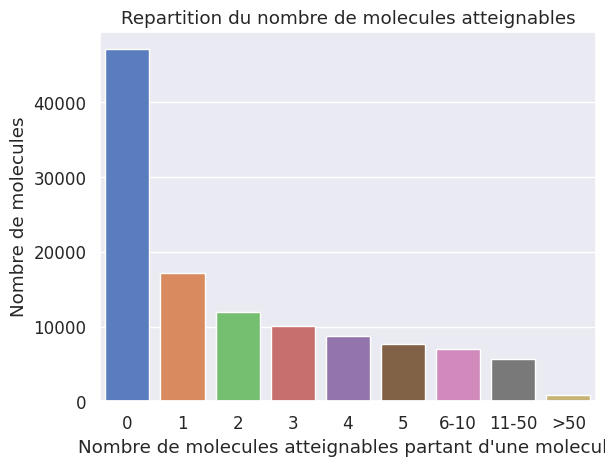

In [12]:
reachable_bins = [-1, 0, 1, 2, 3, 4, 5, 10, 50, 1600]
reach_idx = [0, 1, 2, 3, 4, 5, "6-10", "11-50", ">50"]
reach = pd.cut(frame['reachables'], bins=reachable_bins).value_counts(); reach.index = reach_idx
sns.barplot(x=reach.index, y=reach.values)
plt.title('Repartition du nombre de molecules atteignables')
plt.xlabel('Nombre de molecules atteignables partant d\'une molecule')
plt.ylabel('Nombre de molecules')

On en conclut que partant d'une molécule, n'importe la quelle, on ne peut pas atteindre plus de 50 autres molécules différentes.

Text(0, 0.5, 'Nombre de clusters')

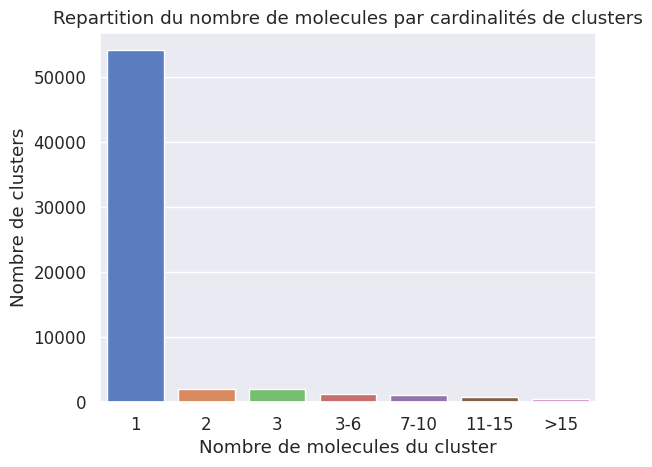

In [14]:
#@ ## Nombre de molecules par cardinalité de clusters
## Un cluster est une liste de molecules qui sont réactives entre elles
clusters_bins = [0, 1, 2, 3, 6, 10, 15, 400000]
cluster_idx   = [   1, 2, 3, '3-6', '7-10', '11-15', '>15']
clusters = pd.cut(frame['clusters'].value_counts(), bins=clusters_bins).value_counts()
clusters.index = cluster_idx
sns.barplot(x=clusters.index, y=clusters.values)
plt.title('Repartition du nombre de molecules par cardinalités de clusters')
plt.xlabel('Nombre de molecules du cluster')
plt.ylabel('Nombre de clusters')
# frame['clusters'].value_counts()

<Axes: >

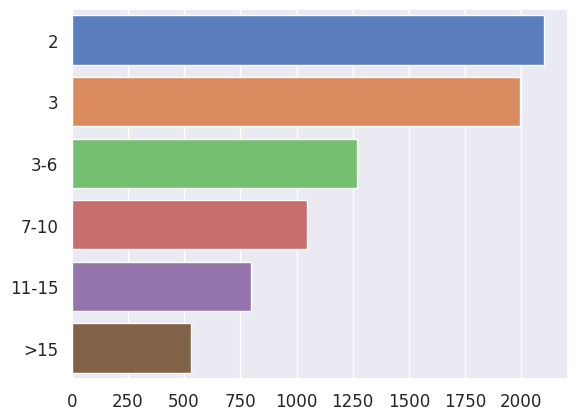

In [15]:
clusters2 = clusters[1:]; clusters2.index = cluster_idx[1:]; clusters2
sns.barplot(x=clusters2.values, y=clusters2.index)

In [16]:
print('Statistiques sur les clusters')
print('Un cluster est constitué de molécules qui sont liées entre elles par des réactions où elles sont réactives')
frame['clusters'].value_counts().describe()

Statistiques sur les clusters
Un cluster est constitué de molécules qui sont liées entre elles par des réactions où elles sont réactives


count    61795.000000
mean         1.880638
std          5.903187
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        372.000000
Name: count, dtype: float64

On voit **61,795** clusters. Il y a **116,214** molécules. Plusieurs sont seules dans leurs clusters. Ceci ce traduit par le fait que certaines molécules ne participent dans des réactions qu'en tant que produit.

In [17]:
frame['clusters'].value_counts()

clusters
73740     372
28065     349
69670     331
23403     314
46380     307
         ... 
39299       1
39300       1
39301       1
39303       1
116212      1
Name: count, Length: 61795, dtype: int64

# **Observations générales:**


1.   On a **6.18%** de réactions avec un seul réactif

2.  On a **2.48%** de réactions avec plus de 3 réactifs






In [18]:
print(" Statistiques sur le nombre de reactifs par réaction")
reaction_df['reactifs'].describe()

 Statistiques sur le nombre de reactifs par réaction


count    115099.000000
mean          2.143007
std           0.547331
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           6.000000
Name: reactifs, dtype: float64

In [19]:
print(" Statistiques sur le nombre de réactions par molécule")
dataframe['molecularities'].describe()

 Statistiques sur le nombre de réactions par molécule


count    116214.000000
mean          2.120502
std         146.271316
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max       46706.000000
Name: molecularities, dtype: float64